In [1]:
from tbdynamics.camau.model import build_model
from tbdynamics.tools.inputs import load_params, matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.plotting.backend = "plotly"

In [2]:
from tbdynamics.settings import CM_PATH

### Load fixed params

In [3]:
fixed_params = load_params(CM_PATH / "params.yml")
covid_effects = {
    'detection_reduction':True,
    'contact_reduction':False
}

### Load params

In [ ]:
init_params = {
    "start_population_size": 30000.0,
    "seed_time": 1805.0,
    "seed_num": 1.0,
    "seed_duration": 1.0,
}
mle_params = {
    "contact_rate": 2.4324427131100315,
    "rr_infection_latent": 0.15120385349239338,
    "rr_infection_recovered": 0.13139150248481948,
    "progression_multiplier": 2.381997193280513,
    "seed_time": 1829.2120565235152,
    "seed_num": 31.914425611226136,
    "seed_duration": 12.412727005336615,
    "smear_positive_death_rate": 0.41245757422948465,
    "smear_negative_death_rate": 0.0332667291039445,
    "smear_positive_self_recovery": 0.24349543280847977,
    "smear_negative_self_recovery": 0.11629142937039111,
    "screening_scaleup_shape": 0.3083039887573705,
    "screening_inflection_time": 1998.0496021545282,
    "time_to_screening_end_asymp": 2.48351054145812,
    "acf_sensitivity": 0.7444791569420837,
    "detection_reduction": 0.376996321226916,
    "notif_dispersion": 137.0004091235171,
    "latent_dispersion": 6.633240194960637,
    "passive_notification_smear_positive_dispersion": 19.88708767974502,
    "acf_detectionXact3_trail_dispersion": 29.767148995137067,
    "acf_detectionXact3_control_dispersion": 29.568100559882886,
}
params = init_params | mle_params

In [ ]:
# matrix_homo = np.ones((6, 6))

### Build epidemiological model

In [6]:
model=build_model(fixed_params, matrix,covid_effects)
model.run(params)

In [7]:
trial_mixing = model._mixing_matrices[1]

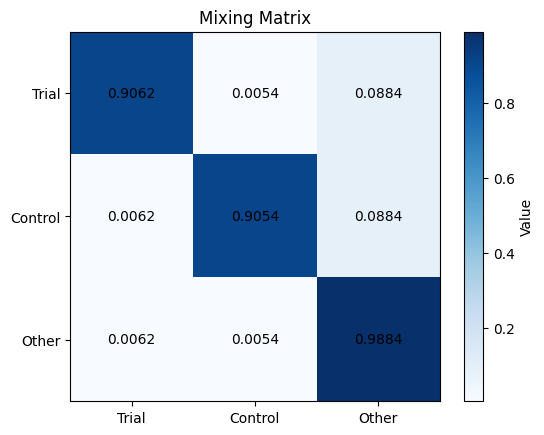

In [8]:
plt.imshow(trial_mixing, cmap='Blues', interpolation='nearest')
plt.colorbar(label='Value')

# Add labels to the axes
plt.xticks(np.arange(trial_mixing.shape[1]), ['Trial', 'Control', 'Other'])
plt.yticks(np.arange(trial_mixing.shape[0]), ['Trial', 'Control', 'Other'])

for i in range(trial_mixing.shape[0]):
    for j in range(trial_mixing.shape[1]):
        plt.text(j, i, f'{trial_mixing[i, j]:.4f}', ha='center', va='center', color='black')

# Add title
plt.title('Mixing Matrix')

# Show the plot
plt.show()

### Get derived outputs

In [9]:
df = model.get_derived_outputs_df()

### Plot outputs

In [10]:
df['total_population'].plot()

In [11]:

df[[f'total_populationXage_{age}' for age in [0, 5, 15, 35, 50, 70]]].plot()

In [12]:
df['incidence'].plot()

In [13]:
df['prevalence_pulmonary'].plot()

In [14]:
df['adults_prevalence_pulmonary'].plot()

In [15]:
df['notification'].plot()

In [16]:
df['detection_rate'].plot()